<font size="7"><center>**Machine Learning Project**</center></font>

<font size="3"><center>Introduction to Machine Learning - Tel-Aviv University</center></font>



<font size="4"><div style="text-align: left">**Submitted by:**</div></font>


<font size="3"><div style="text-align: left">Itamar K</div></font>


**<font size=4>Table of Contents</font>**
* [Part 1 - Exploring the Data](#explore)
    * [Filling Missing Values](#missing)
    * [Making the Data Numeric](#numeric)
    * [Visualisation](#visual)
    * [Reducing the Dimension - Feature Selection](#reduce)        
* [Part 2 - Preprocessing](#pre)
    * [Outliers Removal](#outlier)
    * [Data Normalization](#normal)
    * [Principal Component Analysis (PCA)](#pca)
    * [Preprocessing for the Test](#testpre) 
* [Part 3 - Models](#models)
    * [Splitting the Data](#split)
    * [K-Nearest Neighbors (KNN)](#knn)
    * [Naive Bias](#naive)
    * [Logistic Regression](#logistic)
    * [Artificial Neural Network (ANN)](#ann)
    * [Desicion Tree](#tree)
    * [Random Forest](#forest)
    * [Support Vector Machine (SVM)](#svm)
* [Part 4 - Evaluation](#evaluation)
    * [Confusion Matrix](#matrix)
    * [Cross Validation](#cross)
* [Part 5 - Prediction](#predict)


<font size="5"><div style="text-align: left">**Import Libraries**</div></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

<font size="5"><div style="text-align: left">**Load the Dataset**</div></font>

In [2]:
data = pd.read_csv("./train.csv", index_col=0)
data = data.reset_index()

In [3]:
# First look at the data:

data

,Feature_0,Feature_1,Evaporation,Feature_3,Feature_4,Feature_5,Feature_6,MaxTemp,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,WindGustSpeed,Feature_21,Year,Feature_23,Feature_24,label
0,0.896902,6.084509,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,...,13.9,12.2,D,D,28.0,7.0,2011,40.0,10.693188,1
1,2.632690,23.441093,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,...,18.6,16.5,N,I,61.0,43.0,2012,110.0,57.225409,0
2,1.133413,5.994495,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,...,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,146.400294,0
3,2.387702,18.165247,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,...,14.2,11.4,K,D,39.0,24.0,2010,130.0,217.614788,0
4,2.101356,16.652846,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,...,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,81.490780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22156,1.850454,13.518566,2.8,55.0,83.0,K,a23,1.364286,0.685714,4,...,17.5,13.8,D,I,31.0,15.0,2010,90.0,93.492458,0
22157,2.264318,18.774710,3.8,37.0,71.0,I,a5,1.507143,0.742857,5,...,20.4,12.4,N,I,30.0,9.0,2012,240.0,461.337248,0
22158,1.623203,15.733459,3.4,96.0,95.0,G,a0,0.957143,0.821429,7,...,13.3,11.9,E,G,46.0,15.0,2012,260.0,158.589544,1
22159,2.118046,13.232243,3.2,89.0,95.0,N,a17,1.000000,0.700000,5,...,11.9,12.5,J,J,50.0,17.0,2010,150.0,17.000841,1


We can immediately see that there's a lot of editing that should be done in the data. For instance - Changing alphabet values to numbers.

# Exploring the Data:
<a id= 'explore'></a>

## Filling Missing Values
<a id= 'missing'></a>

In [4]:
# Check for features with high precentage of missing values before filling it:

def missing(df):
    print(round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False))

missing(data)

Sunshine         8.44
Feature_5        6.09
WindGustSpeed    6.07
Feature_19       4.60
Feature_18       0.95
Feature_12       0.51
Feature_11       0.48
Feature_4        0.47
Feature_24       0.45
Feature_23       0.45
Feature_21       0.45
Feature_3        0.27
Feature_17       0.23
Feature_16       0.13
Feature_8        0.08
MaxTemp          0.03
Evaporation      0.00
Feature_6        0.00
Feature_1        0.00
label            0.00
Feature_9        0.00
Feature_10       0.00
Feature_13       0.00
Feature_14       0.00
Year             0.00
Feature_0        0.00
dtype: float64


No feature here has high enough percentage of missing values so that it needs to be dropped. Nevertheless, those missing values need to be treated as we can see in the next block.

In [5]:
# Filling missing values with the most frequent value in features that do not contain numbers:

object_col = data.select_dtypes(include = object).columns.tolist()
for column in object_col:
    data[column].fillna(data[column].value_counts().idxmax(), inplace=True)


# Filling missing values with the mean of the whole column for features with numeric values:

data = data.fillna(data.mean())


# Checking that the last two steps did actually work:

data.isnull().sum()


Feature_0        0
Feature_1        0
Evaporation      0
Feature_3        0
Feature_4        0
Feature_5        0
Feature_6        0
MaxTemp          0
Feature_8        0
Feature_9        0
Feature_10       0
Feature_11       0
Feature_12       0
Feature_13       0
Feature_14       0
Sunshine         0
Feature_16       0
Feature_17       0
Feature_18       0
Feature_19       0
WindGustSpeed    0
Feature_21       0
Year             0
Feature_23       0
Feature_24       0
label            0
dtype: int64

## Making the Data Numeric
<a id= 'numeric'></a>

In [6]:
# Convert alphabets to numeric:

# Feature5
data['Feature_5'] = data['Feature_5'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
           [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

# Feature18
data['Feature_18'] = data['Feature_18'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
           [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

# Feature19
data['Feature_19'] = data['Feature_19'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
           [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

# Removing non-numeric values that aren't needed ("cleaning"):

# Feature6
data['Feature_6'] = data['Feature_6'].map(lambda x: x.lstrip('a'))
data['Feature_6'] = data['Feature_6'].astype(float)

# Feature14
data['Feature_14'] = data['Feature_14'].map(lambda x: x.lstrip('+-').rstrip('m'))
data['Feature_14'] = data['Feature_14'].astype(float)

# Replacing value "unknown" with NaN:

# Feature13
data['Feature_13'] = data['Feature_13'].replace('unknown', np.nan)
data['Feature_13'] = data['Feature_13'].astype(float)

We removed all non-numeric values from the data so it can be analyzed. 

## Visualisation
<a id= 'visual'></a>

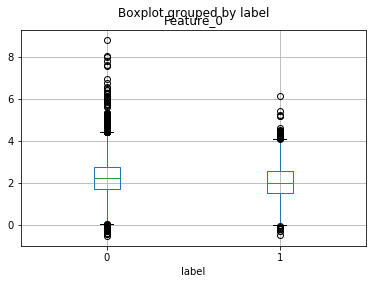

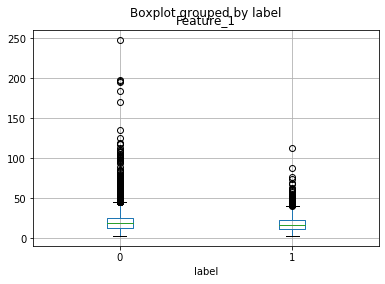

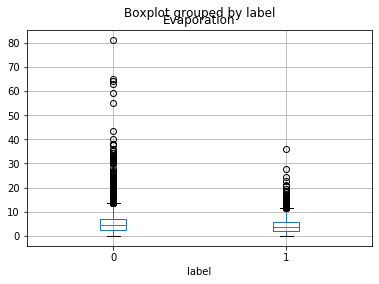

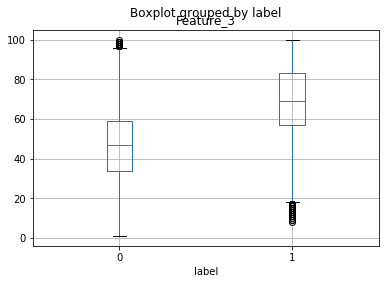

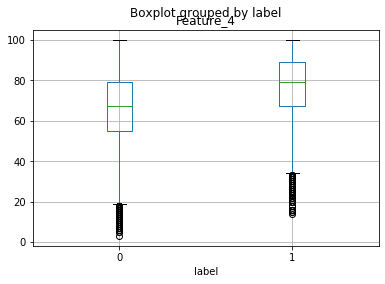

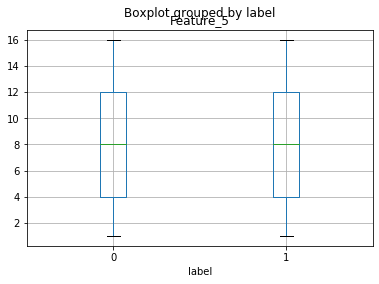

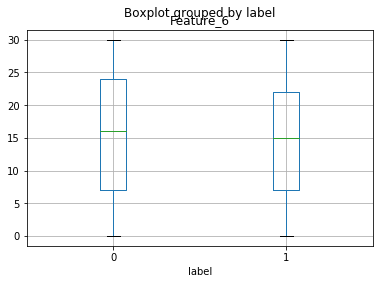

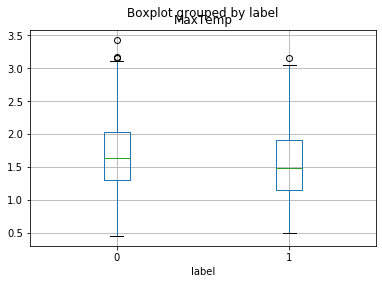

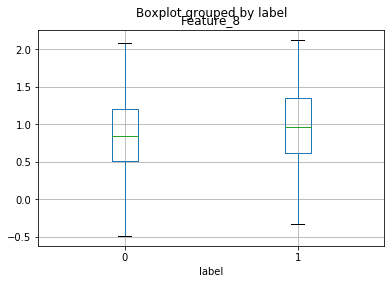

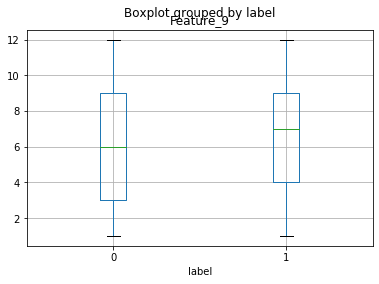

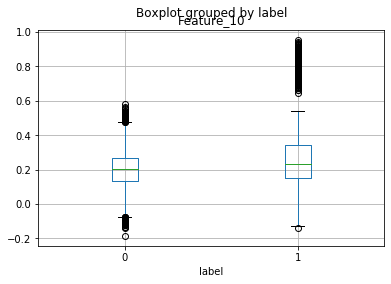

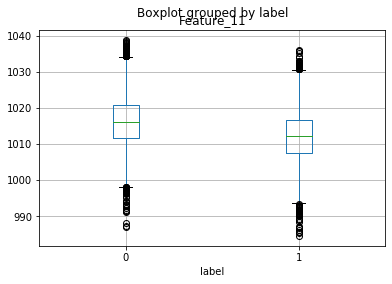

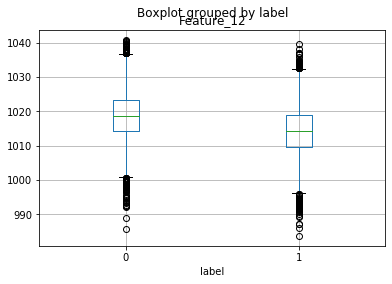

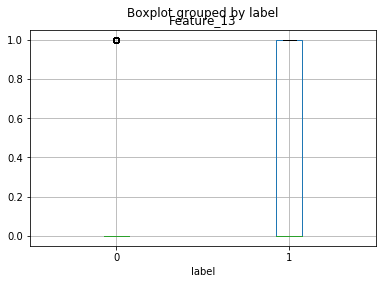

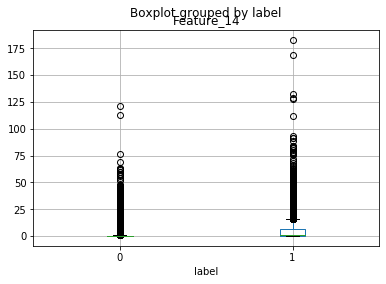

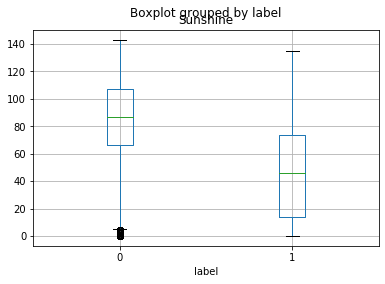

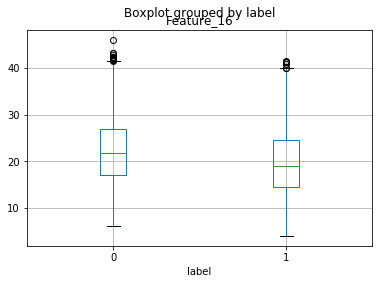

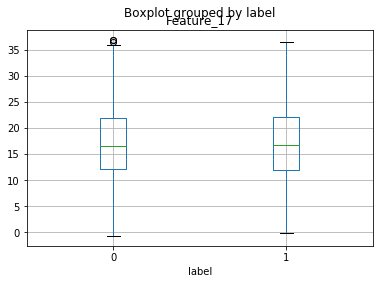

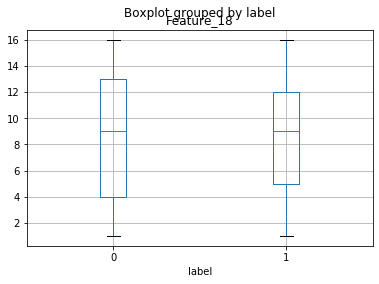

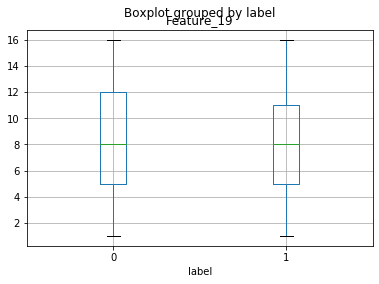

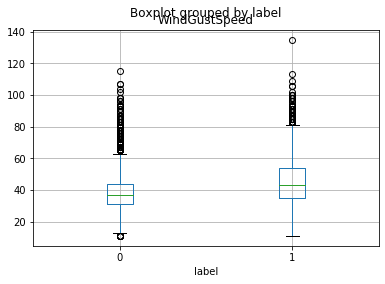

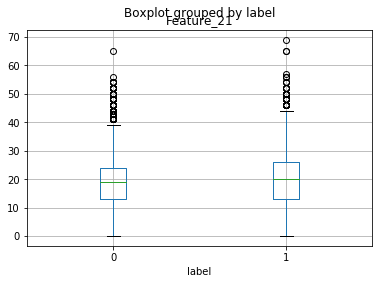

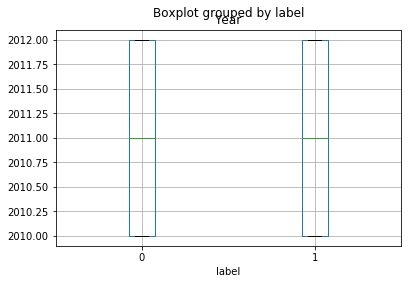

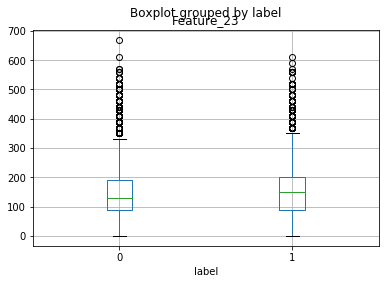

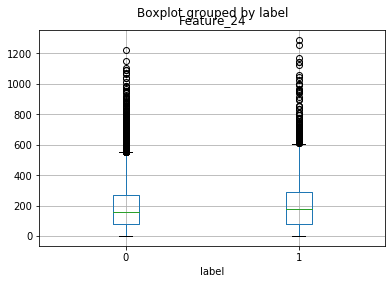

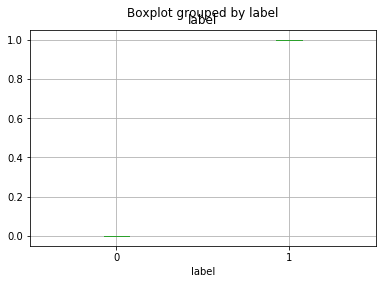

In [7]:
# Boxplotting all the features to show their relationship with the label:

for column in data:
    data.boxplot(column = column, by = "label")
    plt.show()    

With these boxplots we can see two things:

Firstly, in each feature, how different are the values between an instance that the label is 0 and 1. In other words, they give a first glance that helps us tell which of the features have a big influence on the label.

Secondly, we can see that in many features there are a many outliers that should be treated in the preprocessing section.

In [8]:
# Showing statistics of features:

data.describe()

,Feature_0,Feature_1,Evaporation,Feature_3,Feature_4,Feature_5,Feature_6,MaxTemp,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,WindGustSpeed,Feature_21,Year,Feature_23,Feature_24,label
count,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,...,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000,22161.000000
mean,2.188605,19.782469,4.929620,51.547009,68.497982,8.127296,15.320022,1.648476,0.888041,6.429358,...,21.617133,17.065837,8.536303,8.244845,39.995484,19.101577,2010.945264,146.971579,191.782875,0.236451
std,0.816631,10.772055,3.572644,20.157465,18.188484,4.615974,9.038846,0.480199,0.461188,3.381488,...,6.598570,6.401650,4.655753,4.538600,12.745466,8.527820,0.823740,86.414064,148.497710,0.424912
min,-0.534231,2.776724,0.000000,1.000000,3.000000,1.000000,0.000000,0.450000,-0.492857,1.000000,...,3.900000,-0.700000,1.000000,1.000000,11.000000,0.000000,2010.000000,0.000000,0.021012,0.000000
25%,1.627396,12.206173,2.400000,37.000000,57.000000,4.000000,7.000000,1.271429,0.542857,3.000000,...,16.500000,12.100000,4.000000,5.000000,31.000000,13.000000,2010.000000,90.000000,77.085592,0.000000
50%,2.170449,17.848944,4.200000,52.000000,69.000000,8.000000,16.000000,1.607143,0.864286,7.000000,...,21.000000,16.700000,9.000000,8.000000,39.000000,19.000000,2011.000000,130.000000,163.294443,0.000000
75%,2.718441,25.147043,6.600000,65.000000,82.000000,12.000000,23.000000,2.007143,1.242857,9.000000,...,26.400000,21.800000,13.000000,12.000000,46.000000,24.000000,2012.000000,200.000000,272.542627,0.000000
max,8.805001,248.339743,81.200000,100.000000,100.000000,16.000000,30.000000,3.435714,2.128571,12.000000,...,46.100000,36.900000,16.000000,16.000000,135.000000,69.000000,2012.000000,670.000000,1289.931375,1.000000


Because we do not know what every feature really mean it's hard to tell if some of the data here is "bad".

In [9]:
# Decided not to use heatmap eventually:

# sns.heatmap(data.corr(), 
#         xticklabels=data.corr().columns,
#         yticklabels=data.corr().columns)
# plt.show()

In [10]:
# Plotting correlation map that shows how high are all the features correlated with each other:

cor = data.corr(method='pearson').abs()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,Feature_0,Feature_1,Evaporation,Feature_3,Feature_4,Feature_5,Feature_6,MaxTemp,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Sunshine,Feature_16,Feature_17,Feature_18,Feature_19,WindGustSpeed,Feature_21,Year,Feature_23,Feature_24,label
Feature_0,1.00,0.88,0.89,0.36,0.50,0.00,0.08,0.63,0.50,0.07,0.04,0.32,0.29,0.21,0.07,0.32,0.61,0.59,0.00,0.04,0.20,0.14,0.02,0.20,0.10,0.10
Feature_1,0.88,1.00,1.00,0.37,0.50,0.00,0.09,0.62,0.49,0.09,0.04,0.31,0.29,0.20,0.06,0.30,0.60,0.58,0.00,0.03,0.21,0.13,0.03,0.20,0.10,0.10
Evaporation,0.89,1.00,1.00,0.37,0.50,0.00,0.09,0.62,0.50,0.09,0.04,0.31,0.29,0.20,0.06,0.30,0.60,0.58,0.00,0.03,0.21,0.13,0.03,0.21,0.10,0.10
Feature_3,0.36,0.37,0.37,1.00,0.66,0.02,0.08,0.42,0.09,0.02,0.14,0.00,0.08,0.39,0.28,0.59,0.48,0.13,0.01,0.06,0.02,0.03,0.06,0.05,0.04,0.46
Feature_4,0.50,0.50,0.50,0.66,1.00,0.02,0.13,0.46,0.17,0.08,0.07,0.16,0.10,0.37,0.26,0.46,0.46,0.42,0.00,0.01,0.20,0.12,0.06,0.28,0.14,0.26
Feature_5,0.00,0.00,0.00,0.02,0.02,1.00,0.04,0.03,0.01,0.03,0.01,0.00,0.02,0.04,0.03,0.03,0.03,0.03,0.41,0.26,0.03,0.03,0.01,0.03,0.00,0.00
Feature_6,0.08,0.09,0.09,0.08,0.13,0.04,1.00,0.11,0.07,0.01,0.01,0.12,0.10,0.02,0.01,0.08,0.11,0.11,0.04,0.03,0.03,0.01,0.02,0.03,0.01,0.02
MaxTemp,0.63,0.62,0.62,0.42,0.46,0.03,0.11,1.00,0.74,0.21,0.04,0.46,0.37,0.21,0.06,0.41,0.98,0.89,0.04,0.02,0.06,0.02,0.00,0.04,0.00,0.12
Feature_8,0.50,0.49,0.50,0.09,0.17,0.01,0.07,0.74,1.00,0.23,0.03,0.50,0.50,0.08,0.13,0.03,0.72,0.91,0.01,0.09,0.16,0.15,0.04,0.18,0.06,0.12
Feature_9,0.07,0.09,0.09,0.02,0.08,0.03,0.01,0.21,0.23,1.00,0.01,0.06,0.07,0.01,0.02,0.00,0.22,0.17,0.03,0.03,0.04,0.05,0.06,0.06,0.03,0.01


We can now see very clearly which of the features is highly correlated with the label but also we can see that there are a few features that are correlated with each other. With that information we can move to the next step - feature selection in which we will remove and merge features in order to reduce the dimension.

In [11]:
# A first attempt to reduce the data set into 6 features only did not achieve good results:

# reduced_df = data[['Feature_3','Feature_10','Feature_13','Feature_14','WindGustSpeed','Sunshine']].copy()
# reduced_df

In [12]:
# Heatmap for the reduced dataset:

# sns.heatmap(reduced_df.corr(), 
#         xticklabels=reduced_df.corr().columns,
#         yticklabels=reduced_df.corr().columns)
# plt.show()

In [13]:
# Correlation map for the reduced data set:

# cor = reduced_df.corr(method='pearson').abs()
# cor.style.background_gradient(cmap='coolwarm').set_precision(2)

## Reducing the Dimension - Feature Selection
<a id= 'reduce'></a>

In [14]:
# Remove due to low contribution to the model and limited optional values:

data.drop('Feature_5', axis=1, inplace=True)
data.drop('Feature_18', axis=1, inplace=True)
data.drop('Feature_19', axis=1, inplace=True)

# Remove due to low-to-none correlation with the label:

data.drop('Feature_0', axis=1, inplace=True)
data.drop('Feature_1', axis=1, inplace=True)
data.drop('Feature_6', axis=1, inplace=True)
data.drop('Feature_8', axis=1, inplace=True)
data.drop('Feature_9', axis=1, inplace=True)
data.drop('Feature_16', axis=1, inplace=True)
data.drop('Feature_21', axis=1, inplace=True)
data.drop('Feature_23', axis=1, inplace=True)
data.drop('Feature_24', axis=1, inplace=True)
data.drop('Year', axis=1, inplace=True)
data.drop('Evaporation', axis=1, inplace=True)

# Merge features that are highly correlated with each other:

data['MaxTemp_17'] = data[['MaxTemp', 'Feature_17']].mean(axis=1)
data['Feature_11_12'] = data[['Feature_11', 'Feature_12']].mean(axis=1)

# Remove due to prior merge:

data.drop('Feature_11', axis=1, inplace=True)
data.drop('Feature_12', axis=1, inplace=True)
data.drop('Feature_17', axis=1, inplace=True)
data.drop('MaxTemp', axis=1, inplace=True)

# Remaining features:

data.columns

Index(['Feature_3', 'Feature_4', 'Feature_10', 'Feature_13', 'Feature_14',
       'Sunshine', 'WindGustSpeed', 'label', 'MaxTemp_17', 'Feature_11_12'],
      dtype='object')

We are left with 9 features. As we said in the comments, some features were removed because they have low correlation with the label, some were merged. This step had a lot of trial and error. Eventually, we remained with the features that we found to give the best results.

In [15]:
# Despite what we expected this merge actually lowered all models accuracy:

# data['Feature_0_Evaporation'] = data[['Feature_0', 'Evaporation']].mean(axis=1)

# This merge led to a big difference between Train and Test accuracy - overfitting:

# data['MaxTemp_16_17'] = data[['MaxTemp', 'Feature_16', 'Feature_17']].mean(axis=1)

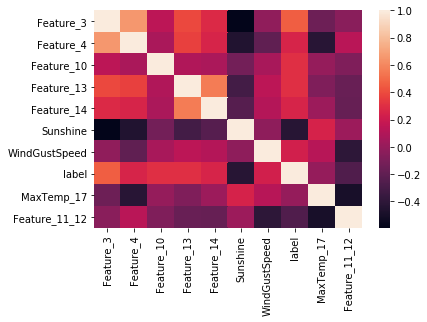

In [16]:
# Heatmap for the features that are left:

sns.heatmap(data.corr(), 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)
plt.show()

# Preprocessing
<a id= 'pre'></a>

## Outliers Removal
<a id= 'outlier'></a>

In [17]:
# Removal of outliers, feeding the new data into a new dataset, "data2":

data2 = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

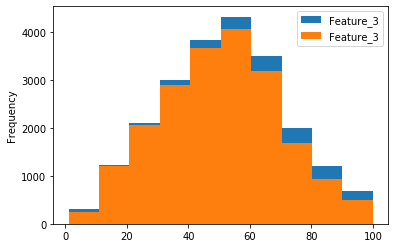

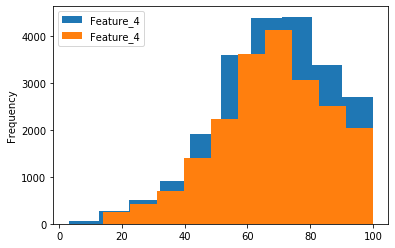

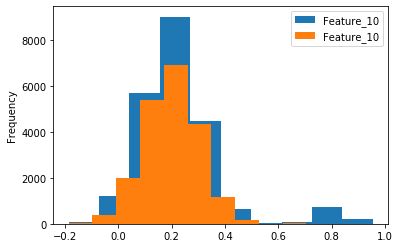

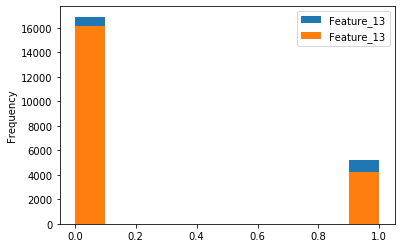

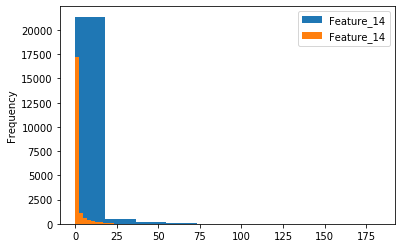

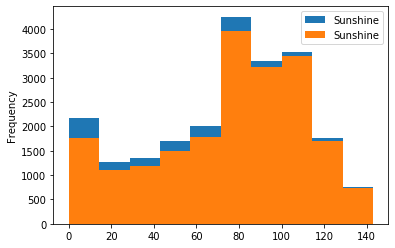

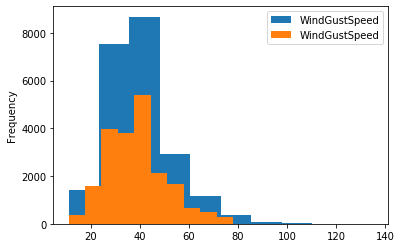

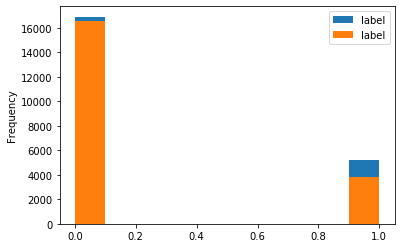

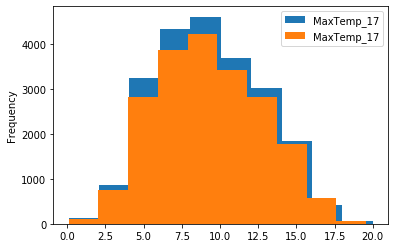

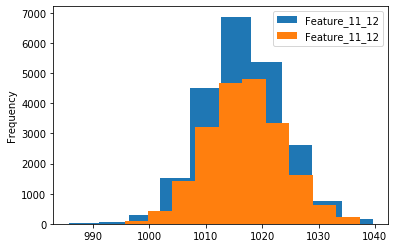

In [18]:
# Plotting all the features from the two datasets (with and without outliers) to see the effect:

for column in data:
    data[column].plot.hist()
    data2[column].plot.hist()
    plt.legend()
    plt.show()
    plt.close()

After we removed the outliers we can see the results in the graphs. Running the models with ouliers would have given a bad performance. ### הסבר

## Data Normalization
<a id= 'normal'></a>

In [19]:
# Scaling to range of 0-1 of the data using MinMaxScaler:

norm_data = data2.copy()
label = norm_data.pop('label')
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(norm_data)
scaled = min_max_scaler.transform(norm_data)
data_scaled = pd.DataFrame(scaled, columns=norm_data.columns)
data_scaled.describe()

,Feature_3,Feature_4,Feature_10,Feature_13,Feature_14,Sunshine,WindGustSpeed,MaxTemp_17,Feature_11_12
count,20398.000000,20398.000000,20398.000000,20398.000000,20398.000000,20398.000000,20398.000000,20398.000000,20398.000000
mean,0.499733,0.628511,0.433884,0.206442,0.058258,0.529086,0.421195,0.473973,0.510095
std,0.198027,0.207383,0.113966,0.404761,0.148827,0.248497,0.176560,0.174635,0.161523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353535,0.500000,0.356940,0.000000,0.000000,0.370629,0.298507,0.338162,0.399281
50%,0.505051,0.639535,0.433366,0.000000,0.000000,0.552448,0.417910,0.463231,0.505995
75%,0.636364,0.779070,0.510479,0.000000,0.025424,0.720280,0.522388,0.604025,0.618705
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Normalization of the dataset:

standard_scaler = StandardScaler()
standard_scaler.fit(norm_data)
scaled2 = standard_scaler.transform(norm_data)
data_scaled2 = pd.DataFrame(scaled2, columns=norm_data.columns)
data_scaled2.describe()

,Feature_3,Feature_4,Feature_10,Feature_13,Feature_14,Sunshine,WindGustSpeed,MaxTemp_17,Feature_11_12
count,2.039800e+04,2.039800e+04,2.039800e+04,2.039800e+04,2.039800e+04,2.039800e+04,2.039800e+04,2.039800e+04,2.039800e+04
mean,1.111693e-17,-5.135639e-16,7.249814e-18,-4.069312e-16,-3.182108e-16,3.089498e-16,-1.416673e-16,-6.398832e-17,7.285802e-15
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.523623e+00,-3.030753e+00,-3.807211e+00,-5.100461e-01,-3.914610e-01,-2.129200e+00,-2.385615e+00,-2.714144e+00,-3.158114e+00
25%,-7.382909e-01,-6.196944e-01,-6.751614e-01,-5.100461e-01,-3.914610e-01,-6.376761e-01,-6.948910e-01,-7.777000e-01,-6.860771e-01
50%,2.685152e-02,5.315923e-02,-4.544413e-03,-5.100461e-01,-3.914610e-01,9.401485e-02,-1.860150e-02,-6.150987e-02,-2.538257e-02
75%,6.899749e-01,7.260128e-01,6.721056e-01,-5.100461e-01,-2.206292e-01,7.694219e-01,5.731518e-01,7.447291e-01,6.724296e-01
max,2.526317e+00,1.791364e+00,4.967515e+00,1.960607e+00,6.327925e+00,1.895100e+00,3.278310e+00,3.012227e+00,3.033113e+00


We used two approaches for that step. Since every model runs better with different kind of dataset we eventually decided to go with both. 
The use of the standard scaler returns standard normal distributed data. The MinMax scaler returns a fixed 0-1 ranged dataset.

## Principal Component Analysis 
<a id= 'pca'></a>

In [21]:
# PCA for the scaled (0-1) dataset:

pca = PCA(n_components=2)
pca.fit(data_scaled)
X_new = pca.transform(data_scaled)

print('Shape of the PCA Data:',X_new.shape)
print('Explained Variance Ratio:',pca.explained_variance_ratio_.sum())
print('PCA Components:',pca.components_)

data_pca = pd.DataFrame(data = X_new, columns = ['A', 'B'])


Shape of the PCA Data: (20398, 2)
Explained Variance Ratio: 0.6686967393341442
PCA Components: [[ 0.2534523   0.25246595  0.00101489  0.85064662  0.24344299 -0.28341029
   0.03519463 -0.08106457 -0.03203387]
 [-0.36894691 -0.43770296  0.00170443  0.39994104  0.1093929   0.5397078
   0.23280136  0.31566825 -0.23504109]]


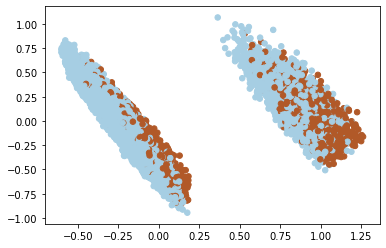

In [22]:
# Plotting in 2 dimensions:

plt.scatter(X_new[:, 0], X_new[:, 1], c=label, s=30, cmap=plt.cm.Paired)
plt.show()

In [23]:
# PCA for the normalized dataset:

pca2 = PCA(n_components=2)
pca2.fit(data_scaled2)
X_new2 = pca2.transform(data_scaled2)

print('Shape of the PCA Data:',X_new2.shape)
print('Explained Variance Ratio:',pca2.explained_variance_ratio_.sum())
print('PCA Components:',pca2.components_)

data_pca2 = pd.DataFrame(data = X_new2, columns = ['A', 'B'])

Shape of the PCA Data: (20398, 2)
Explained Variance Ratio: 0.5237988273167823
PCA Components: [[ 0.46720019  0.48148771  0.00102661  0.39958904  0.36436247 -0.41599862
  -0.05714686 -0.27434055  0.0766665 ]
 [ 0.03276295 -0.16930126  0.00426423  0.33060007  0.35097359  0.00747084
   0.45469505  0.43745178 -0.58275137]]


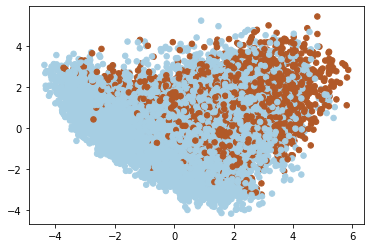

In [24]:
# Plotting in 2 dimensions:

plt.scatter(X_new2[:, 0], X_new2[:, 1], c=label, s=30, cmap=plt.cm.Paired)
plt.show()

We ran the PCA algorithm for both the normalized and the scaled dataset. The PCA reduced the dimension of both of them to two. 

## Preprocessing for the Test
<a id= 'testpre'></a>

In [25]:
# Loading the test dataset:

test_data = pd.read_csv("./test_without_target.csv", index_col=0)

# Removing non-numeric values that aren't needed:

test_data['Feature_14'] = test_data['Feature_14'].map(lambda x: x.rstrip('m'))
test_data['Feature_14'] = test_data['Feature_14'].astype(float)

# Replacing value "unknown" with NaN:

test_data['Feature_13'] = test_data['Feature_13'].replace('unknown', np.nan)
test_data['Feature_13'] = test_data['Feature_13'].astype(float)

# filling missing values with the mean of the whole column for features with numeric values:

test_data = test_data.fillna(test_data.mean())

# Features Selection:

# Remove due to low contribution to the model and limited optional values:

test_data.drop('Feature_5', axis=1, inplace=True)
test_data.drop('Feature_18', axis=1, inplace=True)
test_data.drop('Feature_19', axis=1, inplace=True)

# Remove due to low-to-none correlation with the label:

test_data.drop('Feature_0', axis=1, inplace=True)
test_data.drop('Feature_1', axis=1, inplace=True)
test_data.drop('Feature_6', axis=1, inplace=True)
test_data.drop('Feature_8', axis=1, inplace=True)
test_data.drop('Feature_9', axis=1, inplace=True)
test_data.drop('Feature_16', axis=1, inplace=True)
test_data.drop('Feature_24', axis=1, inplace=True)
test_data.drop('Feature_21', axis=1, inplace=True)
test_data.drop('Feature_23', axis=1, inplace=True)
test_data.drop('Year', axis=1, inplace=True)
test_data.drop('Evaporation', axis=1, inplace=True)

# Merge features that are highly correlated with each other:

test_data['MaxTemp_17'] = test_data[['MaxTemp', 'Feature_17']].mean(axis=1)
test_data['Feature_11_12'] = test_data[['Feature_11', 'Feature_12']].mean(axis=1)
# test_data['Feature_0_Evaporation'] = test_data[['Evaporation', 'Feature_0']].mean(axis=1)

# Remove due to prior merge:

test_data.drop('Feature_11', axis=1, inplace=True)
test_data.drop('Feature_12', axis=1, inplace=True)
test_data.drop('Feature_17', axis=1, inplace=True)
test_data.drop('MaxTemp', axis=1, inplace=True)


# Standard normalization of the test data:

standard_scaler.fit(test_data)
standard_test_data = standard_scaler.transform(test_data)
standard_test = pd.DataFrame(standard_test_data, columns=test_data.columns)


# We eventually found that the best performance of Random Forest is when we use standard normalization 
# and PCA is not executed:

# min_max_scaler.fit(test_data)
# scaled_test_data = min_max_scaler.transform(test_data)
# scaled_test = pd.DataFrame(scaled_test_data, columns=test_data.columns)

# Principal Component Analysis:

# pca.fit(scaled_test)
# test_pca = pca.transform(scaled_test)
# print('shape of PCA data',test_pca.shape)
# print('explained variance ratio: ',pca.explained_variance_ratio_)

# test_df_final = pd.DataFrame(data = test_pca, columns = ['principal component 1', 'principal component 2'])


For the preprocessing of the test we repeated most of the steps we did with the training dataset. Since we chose to go with the Random Forest model, we used the approach that gave the best results in the training - standard normalization without PCA.

# Models
<a id= 'models'></a>

## Splitting the Data
<a id= 'split'></a>

In [26]:
# Splitting the scaled (0-1) + PCA dataset:

X_train, X_test, y_train, y_test = train_test_split(data_pca, label, test_size=0.33,shuffle=False,random_state=42)

# Splitting the normalized + PCA dataset:

X_train2, X_test2, y_train2, y_test2 = train_test_split(data_pca2, label, test_size=0.33,shuffle=False,random_state=42)

# Splitting the scaled (0-1) dataset:

X_train3, X_test3, y_train3, y_test3 = train_test_split(data_scaled, label, test_size=0.33,shuffle=False,random_state=42)

# Splitting the normalized dataset:

X_train4, X_test4, y_train4, y_test4 = train_test_split(data_scaled2, label, test_size=0.33,shuffle=False,random_state=42)

We splitted the data to train and test for every dataset. Scaled with and without PCA, Normalized with and without PCA.

## K-Nearest Neighbors
<a id= 'knn'></a>

In [27]:
# Finding the best parameters for KNN:

parametersOptions = {'n_neighbors': [3, 5 ,10, 15, 20, 40, 60, 80, 100],
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']}
GS_Knn = GridSearchCV(KNeighborsClassifier(), parametersOptions, cv=3, scoring = 'roc_auc')
GS_Knn.fit(X_train, y_train)

print('KNN Best Parameters: {}'.format(GS_Knn.best_params_))
print('KNN Score with the Best Parameters: {}'.format(GS_Knn.best_score_))

KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 60, 'weights': 'uniform'}
KNN Score with the Best Parameters: 0.8481747808033478


In [28]:
# Running the model:

knn = KNeighborsClassifier(**GS_Knn.best_params_)
knn.fit(X_train, y_train)
c_matrix = knn.predict(X_test)
print('--Accuracy of K-Nearest Neighbors--\n')
print('Test:', knn.score(X_test, y_test))
print('Train:', knn.score(X_train, y_train))

--Accuracy of K-Nearest Neighbors--

Test: 0.8456625074272133
Train: 0.8535782233279672


## Naive Bias
<a id= 'naive'></a>

In [29]:
# # Running the Model:

# gnb = GaussianNB()
# gnb.fit(X_train2, y_train2)
# gnb.predict(X_test2)
# print('--Accuracy of Naive Bias--\n')
# print('Test:', gnb.score(X_test2, y_test2))
# print('Train:', gnb.score(X_train2, y_train2))

## Logistic Regression
<a id= 'logistic'></a>

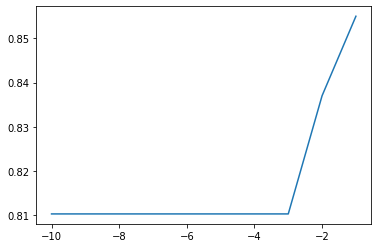

The Best C for Logistic Regression: 0.1


In [30]:
# Finding the best parameters for Logistic Regression:

powers = range(-10,0)
Cs = [10**p for p in powers]
c_score = []

for c in Cs:
    LR = LogisticRegression(penalty="l2", solver = "liblinear", C=c, tol=0.0001, max_iter=100)
    LR.fit(X_train3, y_train3)
    c_score.append(LR.score(X_test3, y_test3))

plt.plot(powers, c_score)
plt.show()
    
C_opt_LR = Cs[c_score.index(max(c_score))]
print("The Best C for Logistic Regression:", C_opt_LR)

In [31]:
# Running the Model:

logreg = LogisticRegression(penalty="l2", C=C_opt_LR, tol=0.0001, max_iter=100) 
logreg.fit(X_train3, y_train3)
y_pred_logistic = logreg.predict(X_test3)
print('--Accuracy of Logistic Regression--\n')
print('Test:', logreg.score(X_test3, y_test3))
print('Train:', logreg.score(X_train3, y_train3))

--Accuracy of Logistic Regression--

Test: 0.8541295306001189
Train: 0.8595053417239865


## Artificial Neural Network
<a id= 'ann'></a>

In [32]:
# # Finding the best parameters for ANN:

# parametersOptions = {'activation' : ["logistic", "relu"], #
#                       'hidden_layer_sizes' : [(100,), # 1 large hidden layer
#                                              (50, 50), # 2 medium size layers
#                                              (20, 20, 10, 10, 10)], # multiple small sized layers
#                       'batch_size' : [10, 50],
#                       'learning_rate_init' : [0.1, 0.01]} #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum 
                     
# GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=3, scoring='roc_auc')
# GS.fit(X_train, y_train)

# print ('Artificial Neural Network Best Parameters:\n{}'.format(GS.best_params_))
# print ('Artificial Neural Network score with the Best Parameters: {}', GS.best_score_)

In [33]:
# # Running the Model:

# ann = MLPClassifier(**GS.best_params_)
# ann.fit(X_train, y_train)
# ANN_predict= ann.predict(X_test)
# ANN_train_predict=ann.predict(X_train)

# print('--Accuracy of Artificial Neural Network--\n')
# print('Test:', ann.score(X_test, y_test))
# print('Train:', ann.score(X_train, y_train))

## Decision Tree
<a id= 'tree'></a>

In [34]:
# Finding the best parameters for Decision Tree:

parametersOptions = {'max_depth': [2, 4, 6, 8], 'criterion' :['gini', 'entropy'],
                     'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
DT = GridSearchCV(DecisionTreeClassifier(), parametersOptions, cv=3, scoring = 'roc_auc')
DT.fit(X_train3, y_train3)

print('Decision Tree Best Parameters:\n{}'.format(DT.best_params_))
print('Decision Tree Score with the Best Parameters: {}', DT.best_score_)

Decision Tree Best Parameters:
{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 34, 'min_samples_split': 2}
Decision Tree Score with the Best Parameters: {} 0.8494325477961292


In [35]:
# Running the Model:

DT = DecisionTreeClassifier(**DT.best_params_)
DT.fit(X_train3, y_train3)
y_pred_DT= DT.predict(X_test3)
y_train_score_DF=DT.predict(X_train3)
print('--Accuracy of Decision Tree--\n')
print('Test:',DT.score(X_test3, y_test3))
print('Train:', DT.score(X_train3, y_train3))

--Accuracy of Decision Tree--

Test: 0.8472964943553178
Train: 0.862359139470218


## Random Forest
<a id= 'forest'></a>

In [36]:
# Finding Best Parameters for Random Forest:

RF = RandomForestClassifier()
parameters =  {'max_depth': [2,4,6,8], 'max_features': ['auto', 'sqrt', 'log2'],
               'n_estimators': [50,200], 'criterion' :['gini', 'entropy']}
grid_obj = GridSearchCV(estimator=RF, param_grid=parameters, scoring='roc_auc')
grid_obj.fit(X_train4, y_train4)
print('Random Forest Best Parameters:\n{}'.format(grid_obj.best_params_))
print('Random Forest Score with the Best Parameters: {}', grid_obj.best_score_)

Random Forest Best Parameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}
Random Forest Score with the Best Parameters: {} 0.8745350753910681


In [37]:
# Running the Model:

RF = RandomForestClassifier(**grid_obj.best_params_)
RF.fit(X_train4, y_train4)
RF_predict = RF.predict(X_test4)
print('--Accuracy of Random Forest--\n')
print('Test:',RF.score(X_test4, y_test4))
print('Train:', RF.score(X_train4, y_train4))

--Accuracy of Random Forest--

Test: 0.856951871657754
Train: 0.8875310990780038


In [38]:
print(RF.feature_importances_)

[0.3288894  0.0543561  0.03555685 0.0571943  0.05969619 0.21322088
 0.08446282 0.04785502 0.11876844]


In [57]:
data_scaled2.columns

Index(['Feature_3', 'Feature_4', 'Feature_10', 'Feature_13', 'Feature_14',
       'Sunshine', 'WindGustSpeed', 'MaxTemp_17', 'Feature_11_12'],
      dtype='object')

## Support Vector Machine
<a id= 'svm'></a>

In [39]:
# # Finding the best parameters for Support Vector Machine:

# clf_SVM = svm.SVC(probability=True)

# param_grid = {'C':[1,10,100],
#               'gamma':[1,0.1,0.001],
#               'kernel':['linear','rbf','poly']}
# grid_SVM = GridSearchCV(svm.SVC(), param_grid, cv=3, scoring='roc_auc')

# grid_SVM.fit(X_train3, y_train3)

# print ('Support Vector Machine Best Parameters:{}'.format(grid_SVM.best_params_))
# print ('Support Vector Machine with the Best Parameters: {}', grid_SVM.best_score_)

In [40]:
# # Running the Model:

# SVM = svm.SVC(**grid_SVM.best_params_)
# SVM.fit(X_train3, y_train3)
# print('--Accuracy of Support Vector Machine--\n')
# print('Test:',SVM.score(X_test3, y_test3))
# print('Train:', SVM.score(X_train3, y_train3))

After checking which are the best parameters for each model we ran them and we were able to see the test accuracy which is an indication for how well the model would be able to predict. We decided to print the train accuracy as well in order to know immediatly if there's an overfitting. 

# Evaluation
<a id= 'evaluation'></a>

## Confusion Matrix
<a id= 'matrix'></a>

[[5243  212]
 [ 751  526]]


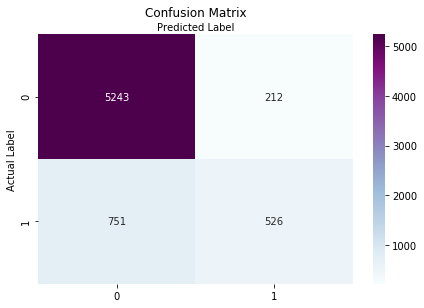

In [41]:
# Creating a confusion matrix:

cm = confusion_matrix(y_test4,RF_predict)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(confusion_matrix(y_test4, RF_predict))

The confusion matrix gives us the first evaluation of the chosen model (RF) performance in a more visualized way:

|   | Actual Positive | Actual Negative ||
| --- | --- | --- | --- |
| Predicted Positive | True Positive | False Positive | Total Predicted Positive
| Predicted Negative | False Negative | True Negative | Total Predicted Negative
| | Total Actual Positive| Total Actual Negative

True Positive - The number of times RF predicted a rainy day correctly.

False Positive - The number of times RF predicted a rainy day and it wasn't. 

True Negative - The number of times RF predicted correctly it is not going to rain.

False Negative - The number of times RF predicted it is not going to rain and it did.

In [42]:
print(classification_report(y_test4, RF_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      5455
           1       0.71      0.41      0.52      1277

    accuracy                           0.86      6732
   macro avg       0.79      0.69      0.72      6732
weighted avg       0.84      0.86      0.84      6732



Our specificity rate is 0.96 which means the model predicted very well when it said it is not going to rain.

## Cross Validation
<a id= 'cross'></a>

In [43]:
### K-fold Cross Validation:

def KfoldPlot(X, y, clf, k):
    clfname = str(clf)[:str(clf).find("(")]
    plt.figure()
    kf = KFold(n_splits=k, random_state=None, shuffle=False)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    i=1
    for train_index, validation_index in kf.split(X):
        print("folding No. ", i)
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]
        clf.fit(X_train, y_train)
        prob_prediction = clf.predict_proba(X_validation)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        plt.plot(fpr, tpr, color='#D3D3D3')
        i+=1
    
    plt.plot([0], [0], color='#D3D3D3', linestyle='-', label='K-folds')    
    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + clfname)
    plt.legend(loc="lower right")
    plt.show()
    
    print('AUC Score: %.3f' % auc(fpr, tpr))

In [44]:
# Setting X as the whole datasets and y as the label, without the columns name:

X, y = data_pca.values, label.values
X2 = data_pca2.values
X3 = data_scaled.values
X4 = data_scaled2.values

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


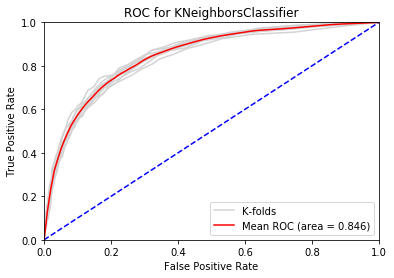

AUC Score: 0.842


In [45]:
# K-Fold plotting KNN:

KfoldPlot(X, y, knn, 10)

In [46]:
# # K-Fold plotting Naive Bias:

# KfoldPlot(X2, y, gnb, 10)

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


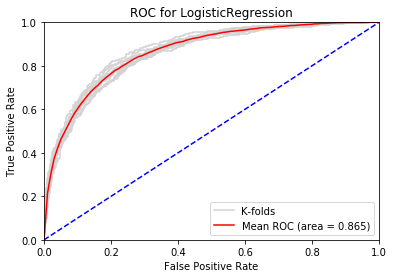

AUC Score: 0.857


In [47]:
# K-Fold plotting Logistic Regression:

KfoldPlot(X3, y, logreg, 10)

In [48]:
# # K-Fold plotting Artificial Neural Network:

# KfoldPlot(X, y, ann, 10)

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


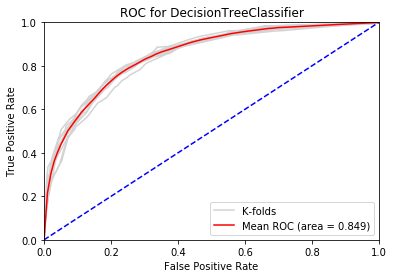

AUC Score: 0.850


In [49]:
# K-Fold plotting Decision Tree:

KfoldPlot(X3, y, DT, 10)

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5
folding No.  6
folding No.  7
folding No.  8
folding No.  9
folding No.  10


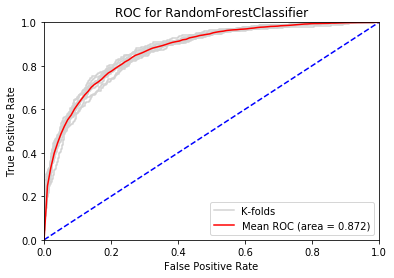

AUC Score: 0.864


In [50]:
# K-Fold plotting Random Forest:

KfoldPlot(X4, y, RF, 10)

In [51]:
# # K-Fold plotting Support Vector Machine:

# KfoldPlot(X, y, SVM, 10)

The K-fold CV allows us to evaluate the model by splitting it to 10 blocks (in our project) and testing each time with a different block.

After we did the cross validation for every model we can see which of them got the best AUC. We saw that Random Forest got the best results - AUC = 0.865. This, in addition to best test accuracy results led us to determine that this model is the best one to predict the label with this kind of data.

# Prediction
<a id= 'predict'></a>

In [52]:
# Creating a list of all label values:

label_list = pd.DataFrame(data=label).values

# Making it a data frame:

label_data = pd.DataFrame(data=label_list, columns= ['label'])
label_data

,label
0,1
1,0
2,0
3,0
4,0
...,...
20393,0
20394,0
20395,1
20396,1


In [53]:
# Initiating Random Forest and building the forest of trees from the training set:

RF_test = RandomForestClassifier(**grid_obj.best_params_)
RF_test.fit(data_scaled2, label_data)

C:\Users\itama\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
# Making the prediction:

predict_proba_test = RF_test.predict_proba(standard_test)
print(predict_proba_test)

[[0.83210849 0.16789151]
 [0.71297788 0.28702212]
 [0.9260197  0.0739803 ]
 ...
 [0.93959969 0.06040031]
 [0.90484115 0.09515885]
 [0.85597813 0.14402187]]


In [55]:
# Making the predictions a new dataframe:

predict_prob_final = pd.DataFrame(data = predict_proba_test[:, 1:])
predict_prob_final.columns = ['Pred_Proba']
predict_prob_final

,Pred_Proba
0,0.167892
1,0.287022
2,0.073980
3,0.051459
4,0.036118
...,...
7382,0.032510
7383,0.350716
7384,0.060400
7385,0.095159


In [56]:
# Export to CSV file:

predict_prob_final.to_csv("prob.csv")